In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import re
import plotly.express as px

In [5]:
#1.data colecting and preprocessing

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
data = pd.read_csv('job_descriptions.csv')

In [9]:
# Check for missing values
print("Missing values before preprocessing:", data.isnull().sum())


Missing values before preprocessing: Job Id                 0
Experience             0
Qualifications         0
Salary Range           0
location               0
Country                0
latitude               0
longitude              0
Work Type              0
Company Size           0
Job Posting Date       0
Preference             0
Contact Person         0
Contact                0
Job Title              0
Role                   0
Job Portal             0
Job Description        0
Benefits               0
skills                 0
Responsibilities       0
Company                0
Company Profile     5478
dtype: int64


In [12]:
print(f'columns:-->')
print(data.columns)
print(f'head-->')
print(data.head())

columns:-->
Index(['Job Id', 'Experience', 'Qualifications', 'Salary Range', 'location',
       'Country', 'latitude', 'longitude', 'Work Type', 'Company Size',
       'Job Posting Date', 'Preference', 'Contact Person', 'Contact',
       'Job Title', 'Role', 'Job Portal', 'Job Description', 'Benefits',
       'skills', 'Responsibilities', 'Company', 'Company Profile'],
      dtype='object')
head-->
             Job Id     Experience Qualifications Salary Range    location  \
0  1089843540111562  5 to 15 Years         M.Tech    $59K-$99K     Douglas   
1   398454096642776  2 to 12 Years            BCA   $56K-$116K    Ashgabat   
2   481640072963533  0 to 12 Years            PhD   $61K-$104K       Macao   
3   688192671473044  4 to 11 Years            PhD    $65K-$91K  Porto-Novo   
4   117057806156508  1 to 12 Years            MBA    $64K-$87K    Santiago   

            Country  latitude  longitude  Work Type  Company Size  ...  \
0       Isle of Man   54.2361    -4.5481     Intern    

In [13]:
data['Job Posting Date'] = pd.to_datetime(data['Job Posting Date'])
data['year'] = data['Job Posting Date'].dt.year
data['month'] = data['Job Posting Date'].dt.month


In [14]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

# Assuming you want to encode 'Role' and 'Company Size'
# If 'industry' column should be replaced with an actual column name, update accordingly.
data['Role_encoded'] = label_enc.fit_transform(data['Role'])
# If there is an 'industry' column that you want to encode, use it instead of 'Company Size'
data['Company_Size_encoded'] = label_enc.fit_transform(data['Company Size'])


In [15]:
#Salary Range column containing string values like '$59K-$99K', which cannot be directly converted to float for normalization.
#need to convert these salary ranges into numerical values.
#step-by-step approach
#1.Extract numerical values from the salary range: Convert the salary ranges into a numerical format, such as the average salary for each range.
#2.Normalize the numerical salary values: Apply the StandardScaler to these numerical values.

In [16]:
# Function to convert salary range to average salary
def convert_salary_range(salary_range):
    if isinstance(salary_range, str):
        # Remove '$' and 'K', and split the range
        salary_range = salary_range.replace('$', '').replace('K', '')
        parts = re.split('-|/', salary_range)  # Handles ranges and single values
        numbers = [float(part) for part in parts if part]
        if len(numbers) == 2:
            return sum(numbers) / 2  # Average of the range
        elif len(numbers) == 1:
            return numbers[0]  # Single value
    return None

# Apply the conversion function to the 'Salary Range' column
data['Salary Numeric'] = data['Salary Range'].apply(convert_salary_range)

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numerical salary values
data['salary_normalized'] = scaler.fit_transform(data[['Salary Numeric']])

In [17]:
#2. Exploratory Data Analysis (EDA)

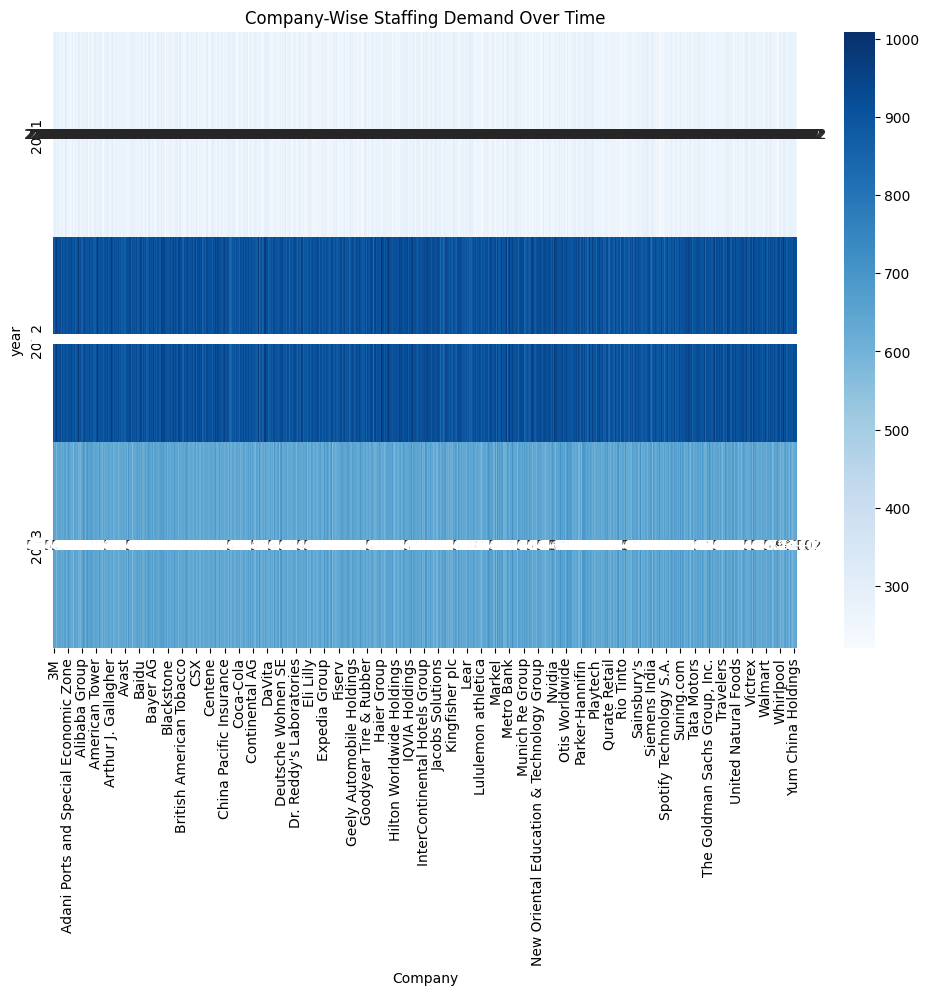

In [21]:

# Analyze job role trends by company (or other relevant grouping) over time
# Using 'Job Posting Date' for time analysis and 'Role' for job roles
# Analyze job role trends by company (or other relevant grouping) over time
# Using 'Job Posting Date' for time analysis and 'Role' for job roles
data['year'] = pd.to_datetime(data['Job Posting Date']).dt.year
company_trend = data.groupby(['year', 'Company'])['Role'].count().reset_index()

# Correct usage of pivot function
company_trend_pivot = company_trend.pivot(index='year', columns='Company', values='Role')

# Heatmap to visualize company demand trends over time
plt.figure(figsize=(12, 8))
sns.heatmap(company_trend_pivot, cmap='Blues', annot=True)
plt.title('Company-Wise Staffing Demand Over Time')
plt.show()




/var/folders/qb/91pjr7ps4rl6vqn8t_7dxvww0000gn/T/ipykernel_94791/556094640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Role', y='Company', data=sectoral_demand, palette='viridis')


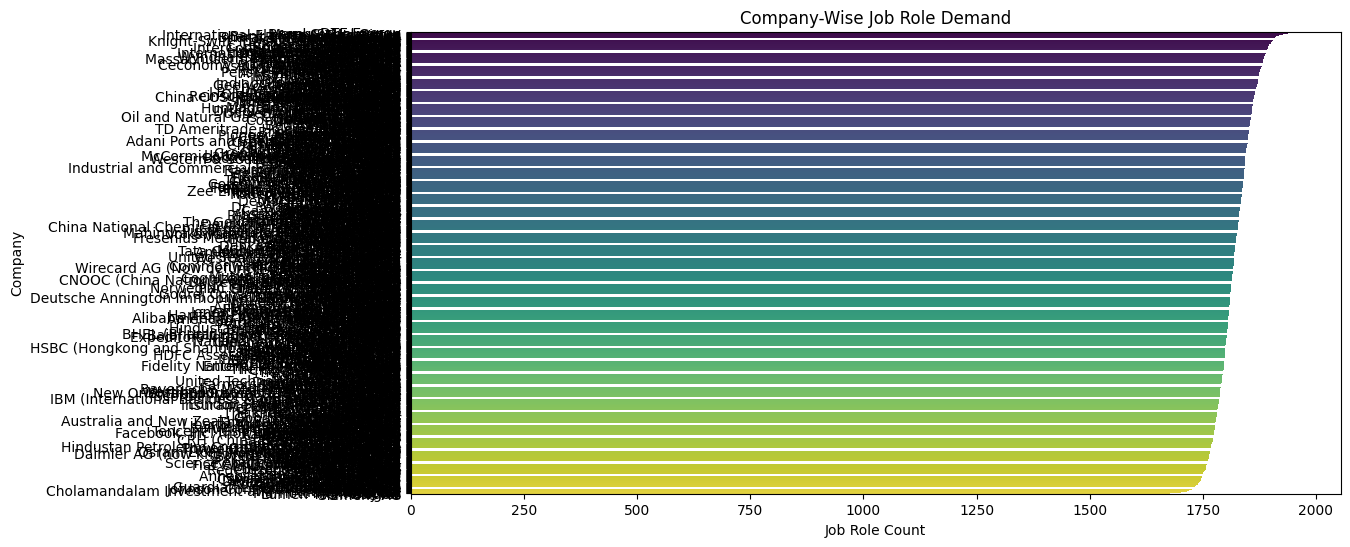

Top companies by job demand:
                              Company  Role
0                          DTE Energy  1957
1                    Marsh & McLennan  1941
2                  Berry Global Group  1941
3                              Vistra  1938
4  International Flavors & Fragrances  1928


In [22]:
# Compare job role demand across companies (sectoral comparison)
sectoral_demand = data.groupby('Company')['Role'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Role', y='Company', data=sectoral_demand, palette='viridis')
plt.title('Company-Wise Job Role Demand')
plt.xlabel('Job Role Count')
plt.ylabel('Company')
plt.show()

# Insights about seasonality and top companies
print("Top companies by job demand:")
print(sectoral_demand.head())

/var/folders/qb/91pjr7ps4rl6vqn8t_7dxvww0000gn/T/ipykernel_94791/1764343911.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Role', y='Company', data=sectoral_demand, palette='viridis')


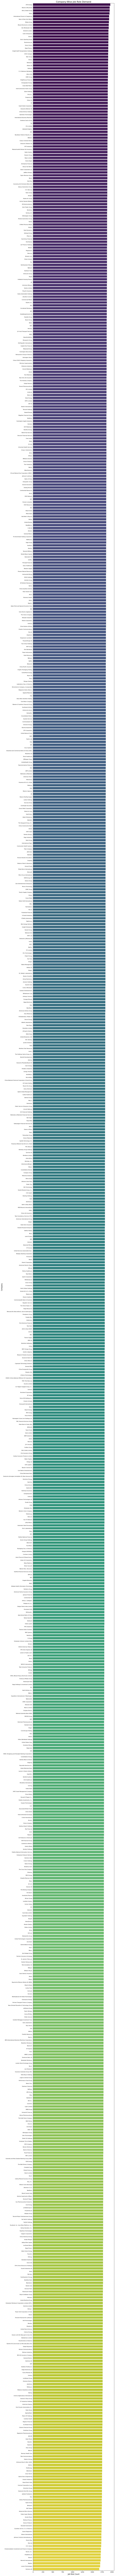

Top companies by job demand:
                              Company  Role
0                          DTE Energy  1957
1                    Marsh & McLennan  1941
2                  Berry Global Group  1941
3                              Vistra  1938
4  International Flavors & Fragrances  1928


In [23]:
# Calculate the number of unique companies
num_companies = len(sectoral_demand['Company'])

# Adjust the figure size dynamically based on the number of companies
plt.figure(figsize=(12, 0.3 * num_companies))  # Height scales with the number of companies

# Horizontal barplot to display all companies
sns.barplot(x='Role', y='Company', data=sectoral_demand, palette='viridis')

# Improving title, labels, and ticks
plt.title('Company-Wise Job Role Demand', fontsize=16)
plt.xlabel('Job Role Count', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xticks(fontsize=10)

# Adjust the font size for y-tick labels
plt.yticks(fontsize=8)  # Reduce font size to avoid overlap

# Optionally, apply a tight layout to handle large datasets
plt.tight_layout()

# Show the plot
plt.show()

# Insights about top companies
print("Top companies by job demand:")
print(sectoral_demand.head())


In [24]:
#here is top 20 companies by job demand

/var/folders/qb/91pjr7ps4rl6vqn8t_7dxvww0000gn/T/ipykernel_94791/1633167988.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Role', y='Company', data=sectoral_demand.head(20), palette='viridis')  # Show top 20 companies


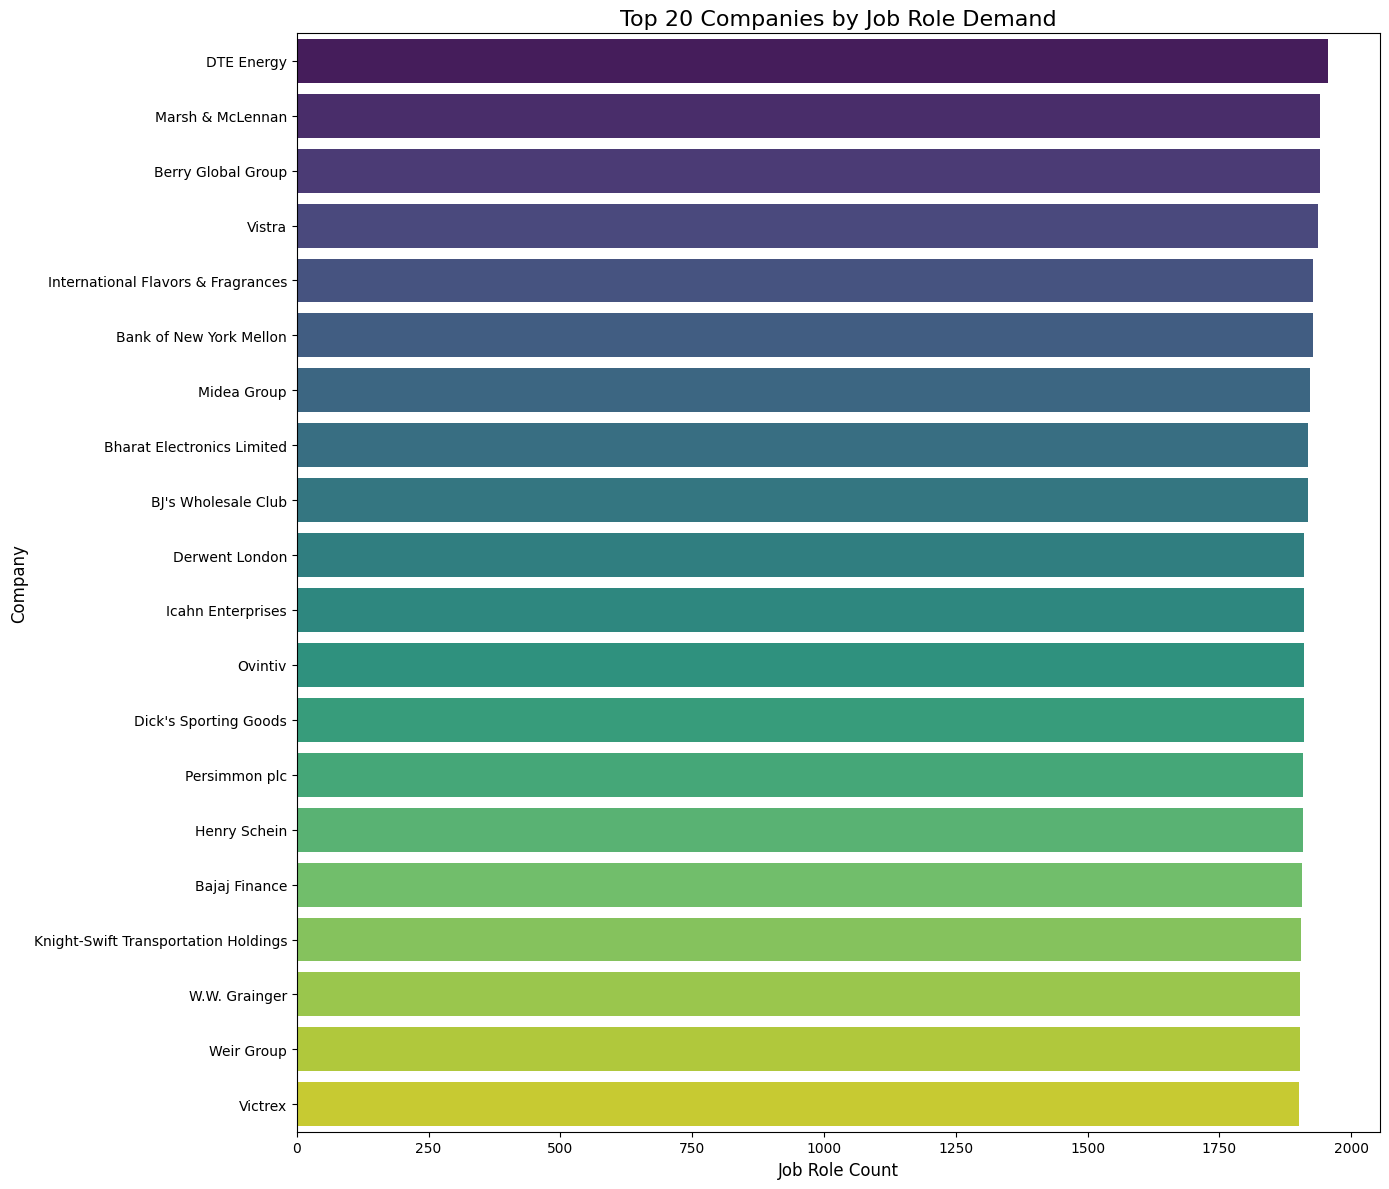

Top companies by job demand:
                                 Company  Role
0                             DTE Energy  1957
1                       Marsh & McLennan  1941
2                     Berry Global Group  1941
3                                 Vistra  1938
4     International Flavors & Fragrances  1928
5                Bank of New York Mellon  1927
6                            Midea Group  1922
7             Bharat Electronics Limited  1918
8                    BJ's Wholesale Club  1918
9                         Derwent London  1911
10                     Icahn Enterprises  1911
11                               Ovintiv  1910
12                 Dick's Sporting Goods  1910
13                         Persimmon plc  1908
14                          Henry Schein  1908
15                         Bajaj Finance  1906
16  Knight-Swift Transportation Holdings  1905
17                         W.W. Grainger  1904
18                            Weir Group  1903
19                             

In [25]:
# Compare job role demand across companies (sectoral comparison)
sectoral_demand = data.groupby('Company')['Role'].count().sort_values(ascending=False).reset_index()

# Adjusting figure size for more space
plt.figure(figsize=(14, 12))

# Horizontal barplot
sns.barplot(x='Role', y='Company', data=sectoral_demand.head(20), palette='viridis')  # Show top 20 companies

# Improving title, labels, and ticks
plt.title('Top 20 Companies by Job Role Demand', fontsize=16)
plt.xlabel('Job Role Count', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()  # Automatically adjusts plot to prevent labels from being cut off
plt.show()

# Insights about top companies
print("Top companies by job demand:")
print(sectoral_demand.head(20))


In [26]:
#3. Time Series Analysis and Forecasting

In [28]:
import statsmodels


In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

In [49]:
# Extract year and month from 'Job Posting Date'
data['Job Posting Date'] = pd.to_datetime(data['Job Posting Date'])
data['year'] = data['Job Posting Date'].dt.year
data['month'] = data['Job Posting Date'].dt.month

In [50]:

# Aggregating monthly staffing demand for time series
monthly_demand = data.groupby(['year', 'month'])['Role'].count().reset_index()
monthly_demand['date'] = pd.to_datetime(monthly_demand[['year', 'month']].assign(day=1))

In [51]:
# Split data into training and testing sets
train_size = int(0.8 * len(monthly_demand))
train, test = monthly_demand[:train_size], monthly_demand[train_size:]

# ARIMA Model
model = ARIMA(train['Role'], order=(5, 1, 0))  # You can tune the (p, d, q) parameters
model_fit = model.fit()

/Users/sandeepkumaraazad/Desktop/intership1_test/data/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


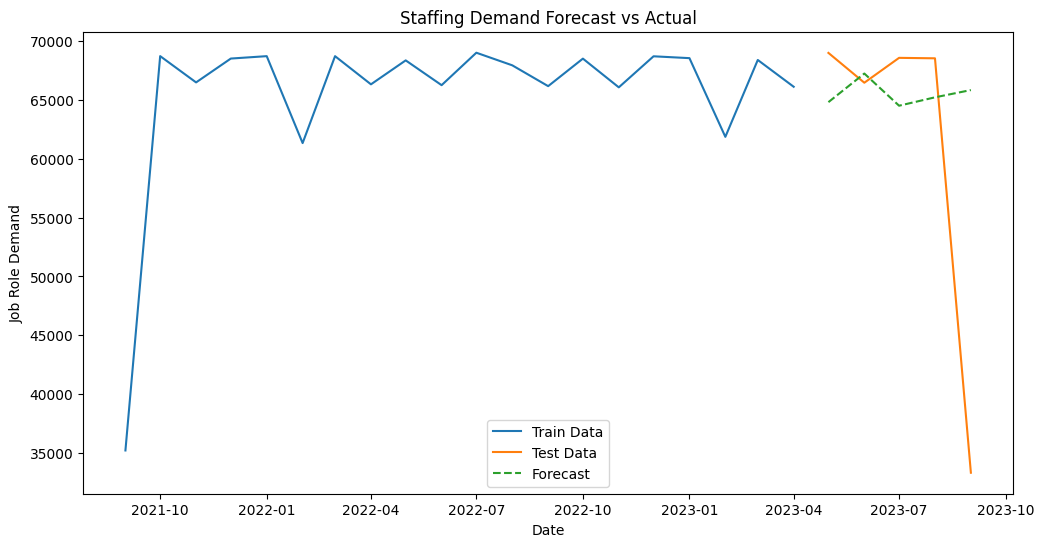

In [52]:
# Forecast future demand
forecast = model_fit.forecast(steps=len(test))

# Plotting forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train['date'], train['Role'], label='Train Data')
plt.plot(test['date'], test['Role'], label='Test Data')
plt.plot(test['date'], forecast, label='Forecast', linestyle='--')
plt.title('Staffing Demand Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Job Role Demand')
plt.legend()
plt.show()

In [53]:
# Evaluate model performance
rmse = np.sqrt(mean_squared_error(test['Role'], forecast))
print(f"Forecast RMSE: {rmse}")

Forecast RMSE: 14856.628441290675


In [58]:
#4market segmentation

In [59]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [73]:
# Ensure data is cleaned and formatted
# Convert salary range to numerical values (e.g., take the midpoint of the range)
def extract_salary_midpoint(salary_range):
    # Check if salary_range is a string and not empty
    if isinstance(salary_range, str):
        # Replace symbols and split ranges
        salary_range = salary_range.replace('$', '').replace('K', '000').replace(',', '')
        parts = salary_range.split('-')
        
        if len(parts) == 2:
            try:
                # Convert to integers and compute midpoint
                low = int(parts[0].strip())
                high = int(parts[1].strip())
                return (low + high) / 2
            except ValueError:
                return np.nan
        elif len(parts) == 1:
            try:
                # Handle cases where there is only a single value
                return int(parts[0].strip())
            except ValueError:
                return np.nan
    return np.nan



In [74]:
# Example DataFrame setup for demonstration
data = pd.DataFrame({
    'Salary Range': ['$59K-$99K', '$56K-$116K', '$61K-$104K', '$65K-$91K', '$64K-$87K']
})

# Apply the function to the 'Salary Range' column
data['salary_midpoint'] = data['Salary Range'].apply(extract_salary_midpoint)

# Display the DataFrame to verify
print(data)

  Salary Range  salary_midpoint
0    $59K-$99K          79000.0
1   $56K-$116K          86000.0
2   $61K-$104K          82500.0
3    $65K-$91K          78000.0
4    $64K-$87K          75500.0


In [85]:
# Apply PCA for dimensionality reduction before clustering
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(segmentation_data)


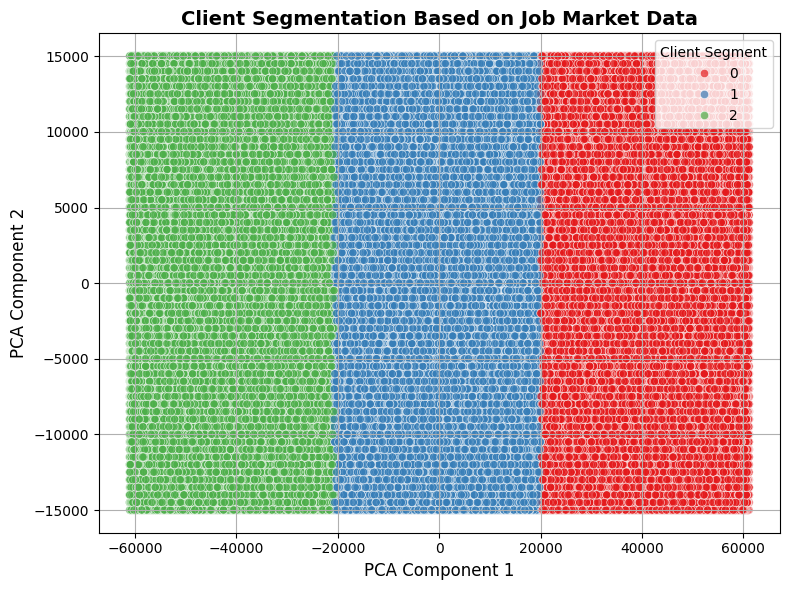

In [86]:
# Visualize clusters with adjusted legend placement
plt.figure(figsize=(8, 6))

# Create scatter plot with transparency to handle large data points better
sns.scatterplot(
    x=reduced_data[:, 0], 
    y=reduced_data[:, 1], 
    hue=segmentation_data['client_segment'], 
    palette='Set1', 
    alpha=0.7  # Adjust transparency for better visualization
)

# Add plot title and labels
plt.title('Client Segmentation Based on Job Market Data', fontsize=14, fontweight='bold')
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)

# Add a grid for better readability
plt.grid(True)

# Manually set the legend location to avoid auto-placing issues
plt.legend(title='Client Segment', loc='upper right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#here is a sample data frmae for better visualisation

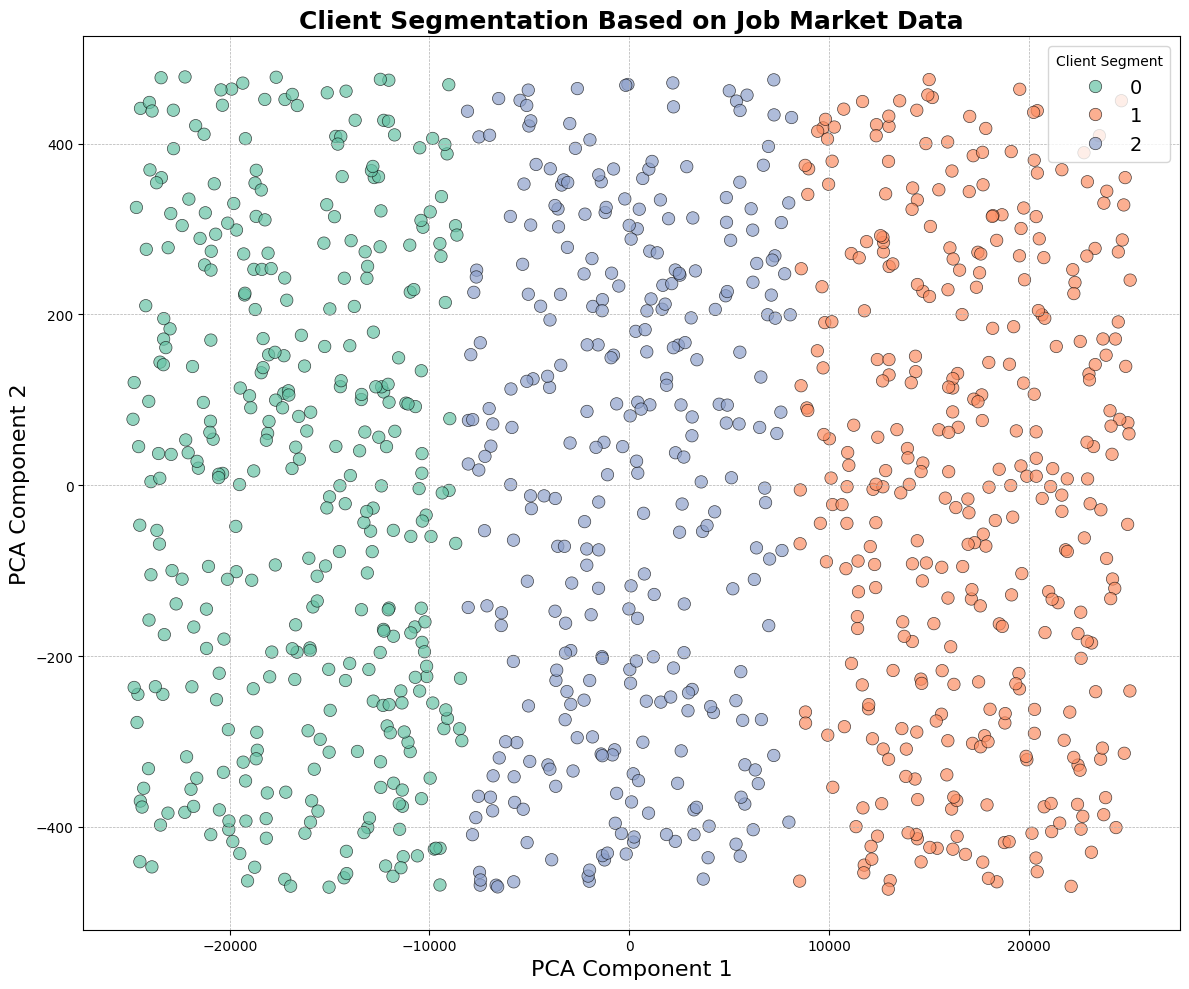

In [89]:
# Expanded DataFrame with 1000 entries
data = pd.DataFrame({
    'salary_normalized': np.random.randint(40000, 90000, 1000),
    'industry_encoded': np.random.randint(1, 5, 1000),
    'company_size': np.random.randint(50, 1000, 1000)
})

# Apply PCA for dimensionality reduction before clustering
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data[['salary_normalized', 'industry_encoded', 'company_size']])

# Apply KMeans clustering to segment clients
kmeans = KMeans(n_clusters=3, random_state=42)
data['client_segment'] = kmeans.fit_predict(reduced_data)

# Ensure 'client_segment' column exists
if 'client_segment' in data.columns:
    # Adjust figure size for better clarity
    plt.figure(figsize=(12, 10))

    # Scatter plot with enhanced settings for visual clarity
    sns.scatterplot(
        x=reduced_data[:, 0], 
        y=reduced_data[:, 1], 
        hue=data['client_segment'], 
        palette='Set2',        # Use a different color palette for better contrast
        alpha=0.7,             # Reduce point transparency to handle overlap
        s=80,                  # Adjust point size for better visibility
        edgecolor='black',     # Add edge color to distinguish clusters
        linewidth=0.5          # Line width for the edges
    )

    # Add a grid for better readability, but reduce the number of grid lines
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)

    # Add title and labels with increased font size
    plt.title('Client Segmentation Based on Job Market Data', fontsize=18, fontweight='bold')
    plt.xlabel('PCA Component 1', fontsize=16)
    plt.ylabel('PCA Component 2', fontsize=16)

    # Manually set the legend location to avoid auto-placing issues
    plt.legend(title='Client Segment', loc='upper right', fontsize=14)

    # Add a tight layout for better fitting of elements
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print("The 'client_segment' column is missing from the DataFrame.")

In [93]:
# Analyze segment profiles
segment_profiles = segmentation_data.groupby('client_segment').mean()
print(segment_profiles)


                salary_midpoint  industry_encoded   Company Size
client_segment                                                  
0                  82488.250492        439.947995  114304.329518
1                  82501.496239        439.910005   73319.542392
2                  82483.686627        439.852423   32789.040825
